In [ ]:
#RFM ANALYSIS
#Recency - how recent has the customer made a pruchase
# Frequence - hoe many times a customer has made purchase
# Monetary - whats amount of money he has spent on the total purchases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
e_data = pd.read_csv("/content/E-com_Data (1).csv")

In [ ]:
e_data

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##duplicate values
e_data.duplicated().sum()

3145

In [ ]:
#dropping the duplicaates
e_data.drop_duplicates(inplace=True)

In [ ]:
e_data.duplicated().sum()

0

In [ ]:
###null values
e_data.isnull().sum()/len(e_data)*100

,0
CustomerID,24.869370
Item Code,0.000186
InvoieNo,0.000186
Date of purchase,0.000186
Quantity,0.000186
Time,0.000186
price per Unit,0.000186
Price,0.000186
Shipping Location,0.000186
Cancelled_status,98.448801


In [ ]:
#so fr the rfm analysis we will choose onyl the cokumns which we need from our dataset
# recency-->Date of purchase	 it will when was the dates he pruchassed items
# frequency - invoiceNo ,based on the no of invoices we can tell how many/ frewuent orders are placed
# monetory = price , gives the amount
# so we can drop other columns


In [ ]:
e_data_rfm = e_data[["CustomerID" ,"Date of purchase" , "InvoieNo" , "Price"]]
e_data_rfm

,CustomerID,Date of purchase,InvoieNo,Price
0,4355.0,29-10-2017,398177.0,1926.0
1,4352.0,05-10-2017,394422.0,1740.0
2,4352.0,12-10-2017,394422.0,1866.0
3,4352.0,22-08-2017,388633.0,1869.0
4,4352.0,10-10-2017,394422.0,1888.0
...,...,...,...,...
537975,NaN,06-02-2017,367605.0,1522.0
537976,NaN,06-02-2017,368246.0,2283.0
537977,NaN,29-01-2017,366891.0,2970.0
537978,NaN,17-09-2017,391243.0,8340.0


In [ ]:
## lets rename the coluns as recency frequency ad monetory
e_data_rfm.rename(columns = {"Date of purchase":"Recency" , "InvoieNo":"Frewuency" , "Price":"Monetary"},inplace=True)

In [ ]:
e_data_rfm.isnull().sum()

,0
CustomerID,133790
Date of purchase,1
InvoieNo,1
Price,1


In [ ]:
# dropping the rows whichever are having missing values
e_data_rfm.dropna(inplace=True)

In [ ]:
e_data_rfm.isnull().sum()

,0
CustomerID,0
Recency,0
Frewuency,0
Monetary,0


In [ ]:
#
#duplicates
e_data_rfm.duplicated().sum()

0

In [ ]:
e_data_rfm.drop_duplicates(inplace=True)

In [ ]:
e_data_rfm.duplicated().sum()

0

In [ ]:
#checking data types
e_data_rfm.dtypes

,0
CustomerID,int64
Recency,datetime64[ns]
Frewuency,int64
Monetary,int64


In [ ]:
for i in e_data_rfm.columns:
  if e_data_rfm[i].dtype == "float64":
    e_data_rfm[i] = e_data_rfm[i].astype("int")

In [ ]:
e_data_rfm.dtypes

,0
CustomerID,int64
Recency,datetime64[ns]
Frewuency,int64
Monetary,int64


In [ ]:
# for date we need to make in date type
import datetime as dt
e_data_rfm["Recency"] = pd.to_datetime(e_data_rfm["Recency"])

In [ ]:
e_data_rfm.dtypes


,0
CustomerID,int64
Recency,datetime64[ns]
Frewuency,int64
Monetary,int64


In [ ]:
e_data_rfm

,CustomerID,Recency,Frewuency,Monetary
0,4355,2017-10-29,398177,1926
1,4352,2017-10-05,394422,1740
2,4352,2017-10-12,394422,1866
3,4352,2017-08-22,388633,1869
4,4352,2017-10-10,394422,1888
...,...,...,...,...
537945,37,2017-11-28,402292,384
537946,37,2017-11-27,402292,398
537947,21,2016-12-21,363890,2464
537948,21,2016-12-21,363890,4068


In [ ]:
## taking the maximum date of purchases meaning the recentest date of purchase made by any customer
max_date = e_data_rfm["Recency"].max()
max_date

# basicalluy this is the date till which dasta was collected
#

Timestamp('2017-12-19 00:00:00')

In [ ]:
latest_date = dt.datetime(2017,12,20)
latest_date
# so this is the lastest date in which no data has ollwcted and this date will be wuseful for us
# to get the recency

datetime.datetime(2017, 12, 20, 0, 0)

In [ ]:
# doing rfm analysis
ecom_data = e_data_rfm.groupby('CustomerID').agg({'Recency' : lambda x: (latest_date-x.max()).days,
                                     "Frewuency":lambda x : x.count() ,
                                     "Monetary": lambda x : x.sum() })


In [ ]:
ecom_data =e_data_rfm.copy()

In [ ]:
ecom_data

,Recency,Frewuency,Monetary
CustomerID,,,
2,4,181,550416
3,77,27,257404
4,19,72,176613
5,311,16,41976
6,37,84,151822
...,...,...,...
4368,278,10,20480
4369,181,7,10774
4370,9,13,24962


In [ ]:
ecom_data

,Recency,Frewuency,Monetary
CustomerID,,,
2,4,181,550416
3,77,27,257404
4,19,72,176613
5,311,16,41976
6,37,84,151822
...,...,...,...
4368,278,10,20480
4369,181,7,10774
4370,9,13,24962


In [ ]:
# taking min and max for each columns
for i in ecom_data.columns:
  print("****" , i , "********")
  print( ecom_data[i].min())
  print( ecom_data[i].max())

**** Recency ********
1
381
**** Frewuency ********
1
7919
**** Monetary ********
-50372
35472089


In [ ]:
# taking the quantile values
qunatiles = ecom_data.quantile( [0.25 , 0.5 , 0.75])
qunatiles

quantiles_dict = qunatiles.to_dict()
quantiles_dict

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frewuency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
#using this quantilw values we must give them scores
# so lesser the recency value better the score
def  recency_score(x,q,d):
  if x<=d[q][0.25]:
    return 1
  elif x<=d[q][0.50]:
    return 2
  elif x<=d[q][0.75]:
    return 3
  else:
    return 4

# similary for frwequency and money more the freuqency and money better the score
def frequency_monetary_score(x,q,d):
  if x<=d[q][0.25]:
    return 4

  elif x<=d[q][0.50]:
    return 3
  elif x<=d[q][0.75]:
    return 2
  else:
    return 1





In [ ]:
# lets create new score columns
ecom_data["Recency_score"] = ecom_data["Recency"].apply(recency_score , args=('Recency',quantiles_dict))
ecom_data["Frewuency_score"] =ecom_data["Frewuency"].apply(frequency_monetary_score , args=('Frewuency',quantiles_dict))
ecom_data["Monetary_score"] =ecom_data["Monetary"].apply(frequency_monetary_score , args=('Monetary',quantiles_dict))

In [ ]:
ecom_data

,Recency,Frewuency,Monetary,Recency_score,Frewuency_score,Monetary_score
CustomerID,,,,,,
2,4,181,550416,1,1,1
3,77,27,257404,3,3,1
4,19,72,176613,2,2,2
5,311,16,41976,4,4,3
6,37,84,151822,2,2,2
...,...,...,...,...,...,...
4368,278,10,20480,4,4,4
4369,181,7,10774,4,4,4
4370,9,13,24962,1,4,4


In [ ]:
##giving Loyality score
ecom_data["Loyality_score"]= ecom_data[["Recency_score" , "Frewuency_score" , "Monetary_score"]].sum(axis=1)

In [ ]:
ecom_data

,Recency,Frewuency,Monetary,Recency_score,Frewuency_score,Monetary_score,Loyality_score
CustomerID,,,,,,,
2,4,181,550416,1,1,1,3
3,77,27,257404,3,3,1,7
4,19,72,176613,2,2,2,6
5,311,16,41976,4,4,3,11
6,37,84,151822,2,2,2,6
...,...,...,...,...,...,...,...
4368,278,10,20480,4,4,4,12
4369,181,7,10774,4,4,4,12
4370,9,13,24962,1,4,4,9


In [ ]:
##loyality badge
badges = ['Platinum' , "Gold" , "Silver" , "Bronze"]
score_badge = pd.qcut(ecom_data["Loyality_score"] , q=4 , labels=badges)
ecom_data["LoyaltyBagde"] = score_badge

In [ ]:
ecom_data

,Recency,Frewuency,Monetary,Recency_score,Frewuency_score,Monetary_score,Loyality_score,LoyaltyBagde
CustomerID,,,,,,,,
2,4,181,550416,1,1,1,3,Platinum
3,77,27,257404,3,3,1,7,Gold
4,19,72,176613,2,2,2,6,Gold
5,311,16,41976,4,4,3,11,Bronze
6,37,84,151822,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...
4368,278,10,20480,4,4,4,12,Bronze
4369,181,7,10774,4,4,4,12,Bronze
4370,9,13,24962,1,4,4,9,Silver


In [ ]:
#  we are sorting the data
segmented_data = ecom_data.reset_index()

In [ ]:
segmented_data

,CustomerID,Recency,Frewuency,Monetary,Recency_score,Frewuency_score,Monetary_score,Loyality_score,LoyaltyBagde
0,2,4,181,550416,1,1,1,3,Platinum
1,3,77,27,257404,3,3,1,7,Gold
2,4,19,72,176613,2,2,2,6,Gold
3,5,311,16,41976,4,4,3,11,Bronze
4,6,37,84,151822,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368,278,10,20480,4,4,4,12,Bronze
4345,4369,181,7,10774,4,4,4,12,Bronze
4346,4370,9,13,24962,1,4,4,9,Silver
4347,4371,4,751,279720,1,1,1,3,Platinum


In [ ]:
segmented_data = segmented_data[["CustomerID" , "Recency" ,"Frewuency" , "Monetary" , "LoyaltyBagde"]]

In [ ]:
segmented_data

,CustomerID,Recency,Frewuency,Monetary,LoyaltyBagde
0,2,4,181,550416,Platinum
1,3,77,27,257404,Gold
2,4,19,72,176613,Gold
3,5,311,16,41976,Bronze
4,6,37,84,151822,Gold
...,...,...,...,...,...
4344,4368,278,10,20480,Bronze
4345,4369,181,7,10774,Bronze
4346,4370,9,13,24962,Silver
4347,4371,4,751,279720,Platinum


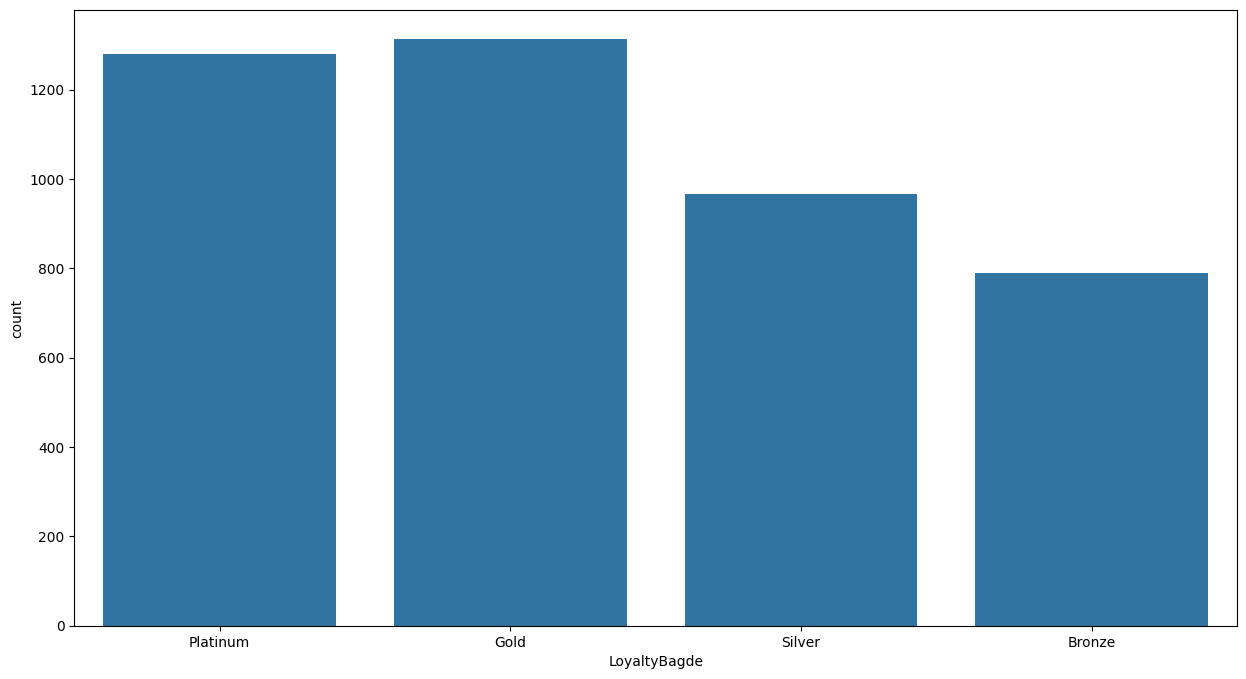

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="LoyaltyBagde" , data=segmented_data)
plt.show()

In [ ]:
######


In [ ]:
bank_data = pd.read_csv("/content/bank_transactions.csv")

In [ ]:
bank_data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207.0,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858.0,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712.0,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714.0,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156.0,1762.5
...,...,...,...,...,...,...,...,...,...
961405,T961406,C1639687,11/4/94,M,DELHI,5185.83,10/9/16,160923.0,500.0
961406,T961407,C1336962,21/6/85,F,GANDHIDHAM,6335.13,10/9/16,161041.0,333.0
961407,T961408,C2633691,26/2/93,F,KANGRA,2229.57,10/9/16,154257.0,720.0
961408,T961409,C7711174,19/11/93,F,NEW DELHI,14855.10,10/9/16,154259.0,1850.0


In [ ]:
#lets do rmf on this dataset
#duplicates
bank_data.duplicated().sum()

0

In [ ]:
#missing values'
bank_data.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3125
CustGender,1012
CustLocation,147
CustAccountBalance,2242
TransactionDate,1
TransactionTime,1
TransactionAmount (INR),1


In [ ]:
# lets take only the columns which are required for RMF
# recency - TransactionDate
# frequency - TransactionTime
#monetary - CustAccountBalance

In [ ]:
bank_data_rfm = bank_data[["CustomerID" , "TransactionDate" , "TransactionTime" , "CustAccountBalance"]]

In [ ]:
bank_data_rfm

,CustomerID,TransactionDate,TransactionTime,CustAccountBalance
0,C5841053,2/8/16,143207.0,17819.05
1,C2142763,2/8/16,141858.0,2270.69
2,C4417068,2/8/16,142712.0,17874.44
3,C5342380,2/8/16,142714.0,866503.21
4,C9031234,2/8/16,181156.0,6714.43
...,...,...,...,...
961405,C1639687,10/9/16,160923.0,5185.83
961406,C1336962,10/9/16,161041.0,6335.13
961407,C2633691,10/9/16,154257.0,2229.57
961408,C7711174,10/9/16,154259.0,14855.10


In [ ]:
### chekcing duplicates
bank_data_rfm.duplicated().sum()

0

In [ ]:
#null alues
bank_data_rfm.isnull().sum()/len(bank_data_rfm)*100

,0
CustomerID,0.000000
TransactionDate,0.000104
TransactionTime,0.000104
CustAccountBalance,0.233199


In [ ]:
bank_data_rfm.dropna(inplace=True)

In [ ]:
bank_data_rfm.isnull().sum()

,0
CustomerID,0
TransactionDate,0
TransactionTime,0
CustAccountBalance,0


In [ ]:
### checking dtypes
bank_data_rfm.dtypes

,0
CustomerID,object
TransactionDate,object
TransactionTime,float64
CustAccountBalance,float64


In [ ]:
bank_data_rfm["TransactionTime"] = bank_data_rfm["TransactionTime"].astype(int)

In [ ]:
import datetime as dt
bank_data_rfm["TransactionDate"] = pd.to_datetime(bank_data_rfm["TransactionDate"])

In [ ]:
bank_data_rfm.dtypes

,0
CustomerID,object
TransactionDate,datetime64[ns]
TransactionTime,int64
CustAccountBalance,float64


In [ ]:
#
max_date = bank_data_rfm["TransactionDate"].max()
max_date

Timestamp('2016-12-09 00:00:00')

In [ ]:
latest_date = dt.datetime(2016,12,10)
latest_date

datetime.datetime(2016, 12, 10, 0, 0)

In [ ]:
bank_data_rfm_1 = bank_data_rfm.copy()

In [ ]:
bank_data_rmf_analyzed = bank_data_rfm.copy()

In [ ]:
bank_data_rmf_analyzed

,CustomerID,TransactionDate,TransactionTime,CustAccountBalance
0,C5841053,2016-02-08,143207,17819.05
1,C2142763,2016-02-08,141858,2270.69
2,C4417068,2016-02-08,142712,17874.44
3,C5342380,2016-02-08,142714,866503.21
4,C9031234,2016-02-08,181156,6714.43
...,...,...,...,...
961404,C1220035,2016-10-09,160716,28639.54
961405,C1639687,2016-10-09,160923,5185.83
961406,C1336962,2016-10-09,161041,6335.13
961407,C2633691,2016-10-09,154257,2229.57


In [ ]:
## RFM Analysis
bank_data_rmf_analyzed = bank_data_rfm.groupby("CustomerID").agg({"TransactionDate" : lambda x:(latest_date-x.max()).days,
                                                         "TransactionTime" : lambda x : x.count(),
                                                         "CustAccountBalance" : lambda x : x.sum()

})

In [ ]:
bank_data_rmf_analyzed

,TransactionDate,TransactionTime,CustAccountBalance
CustomerID,,,
C1010011,75,2,152681.27
C1010012,118,1,24204.49
C1010014,155,2,200225.90
C1010024,114,1,87058.65
C1010028,103,1,296828.37
...,...,...,...
C9099832,102,1,8752.39
C9099836,155,1,133067.23
C9099919,114,1,5559.75


In [ ]:
#getting min and max for each column
for i in bank_data_rmf_analyzed.columns:
  print("****" , i,"********")
  print(bank_data_rmf_analyzed[i].min())
  print(bank_data_rmf_analyzed[i].max())

**** TransactionDate ********
1
337
**** TransactionTime ********
1
6
**** CustAccountBalance ********
0.0
164489259.8


In [ ]:
### finfing the quantiles
quantiles = bank_data_rmf_analyzed.quantile(q=[0.25 , 0.50,0.75])
quantiles

quantiles_dict = quantiles.to_dict()
quantiles_dict

{'Recency': {0.25: 93.0, 0.5: 112.0, 0.75: 155.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 5877.09, 0.5: 20867.96, 0.75: 72640.08}}

In [ ]:
#giving them scores based on quantiles
#lesser the trasaction date better score
def TransactionDate_score(colum,quant,data):
  if colum<=data[quant][0.25]:
    return 1
  elif colum<=data[quant][0.50]:
    return 2
  elif colum<=data[quant][0.75]:
    return 3
  else :
    return 4

def TransactTime_BalanaceScore(colum,quant,data):
  if colum<=data[quant][0.25]:
    return 4
  elif colum<=data[quant][0.50]:
    return 3
  elif colum<=data[quant][0.75]:
    return 2
  else:
    return 1



In [ ]:
#lets change the coumns names
bank_data_rmf_analyzed = bank_data_rmf_analyzed.rename(columns={"TransactionDate":"Recency", "TransactionTime":"Frequency","CustAccountBalance":"Monetary"} )

In [ ]:
bank_data_rmf_analyzed

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,75,2,152681.27
C1010012,118,1,24204.49
C1010014,155,2,200225.90
C1010024,114,1,87058.65
C1010028,103,1,296828.37
...,...,...,...
C9099832,102,1,8752.39
C9099836,155,1,133067.23
C9099919,114,1,5559.75


In [ ]:
#creating score columns
bank_data_rmf_analyzed["Recency_score"]= bank_data_rmf_analyzed["Recency"].apply(TransactionDate_score , args=("Recency" , quantiles_dict))
bank_data_rmf_analyzed["frequency_score"]= bank_data_rmf_analyzed["Frequency"].apply(TransactTime_BalanaceScore , args=("Frequency" , quantiles_dict ))
bank_data_rmf_analyzed["monetary_score"]= bank_data_rmf_analyzed["Monetary"].apply(TransactTime_BalanaceScore , args=("Monetary" , quantiles_dict ))

In [ ]:
bank_data_rmf_analyzed

,Recency,Frequency,Monetary,Recency_score,frequency_score,monetary_score
CustomerID,,,,,,
C1010011,75,2,152681.27,1,1,1
C1010012,118,1,24204.49,3,4,2
C1010014,155,2,200225.90,3,1,1
C1010024,114,1,87058.65,3,4,1
C1010028,103,1,296828.37,2,4,1
...,...,...,...,...,...,...
C9099832,102,1,8752.39,2,4,3
C9099836,155,1,133067.23,3,4,1
C9099919,114,1,5559.75,3,4,4


In [ ]:
#loyalty score
bank_data_rmf_analyzed["loyalty_score"] = bank_data_rmf_analyzed[["Recency_score" , "frequency_score", "monetary_score"]].sum(axis=1)

In [ ]:
bank_data_rmf_analyzed

,Recency,Frequency,Monetary,Recency_score,frequency_score,monetary_score,loyalty_score
CustomerID,,,,,,,
C1010011,75,2,152681.27,1,1,1,3
C1010012,118,1,24204.49,3,4,2,9
C1010014,155,2,200225.90,3,1,1,5
C1010024,114,1,87058.65,3,4,1,8
C1010028,103,1,296828.37,2,4,1,7
...,...,...,...,...,...,...,...
C9099832,102,1,8752.39,2,4,3,9
C9099836,155,1,133067.23,3,4,1,8
C9099919,114,1,5559.75,3,4,4,11


In [ ]:
#
bank_data_rmf_analyzed["loyalty_score"].min()

3

In [ ]:
bank_data_rmf_analyzed["loyalty_score"].max()

12

In [ ]:
#loyalty badges absed on loyality score
badges = ["platinum","gold","silver","bronze"]
loyalty_badge = pd.qcut(bank_data_rmf_analyzed["loyalty_score"] , q=4 , labels= badges)
loyalty_badge
bank_data_rmf_analyzed["loyalti_badges"] = loyalty_badge

In [ ]:
bank_data_rmf_analyzed

,Recency,Frequency,Monetary,Recency_score,frequency_score,monetary_score,loyalty_score,loyalti_badges
CustomerID,,,,,,,,
C1010011,75,2,152681.27,1,1,1,3,platinum
C1010012,118,1,24204.49,3,4,2,9,gold
C1010014,155,2,200225.90,3,1,1,5,platinum
C1010024,114,1,87058.65,3,4,1,8,gold
C1010028,103,1,296828.37,2,4,1,7,platinum
...,...,...,...,...,...,...,...,...
C9099832,102,1,8752.39,2,4,3,9,gold
C9099836,155,1,133067.23,3,4,1,8,gold
C9099919,114,1,5559.75,3,4,4,11,bronze


In [ ]:
bank_data_rmf_analyzed = bank_data_rmf_analyzed.drop(columns = ["Recency_score" , "frequency_score" , "monetary_score"],axis=1)

In [ ]:
bank_data_rmf_analyzed.columns


Index(['Recency', 'Frequency', 'Monetary', 'loyalty_score', 'loyalti_badges'], dtype='object')

In [ ]:
bank_data_rmf_analyzed.reset_index()

,CustomerID,Recency,Frequency,Monetary,loyalty_score,loyalti_badges
0,C1010011,75,2,152681.27,3,platinum
1,C1010012,118,1,24204.49,9,gold
2,C1010014,155,2,200225.90,5,platinum
3,C1010024,114,1,87058.65,8,gold
4,C1010028,103,1,296828.37,7,platinum
...,...,...,...,...,...,...
820124,C9099832,102,1,8752.39,9,gold
820125,C9099836,155,1,133067.23,8,gold
820126,C9099919,114,1,5559.75,11,bronze
820127,C9099941,104,1,35295.92,8,gold


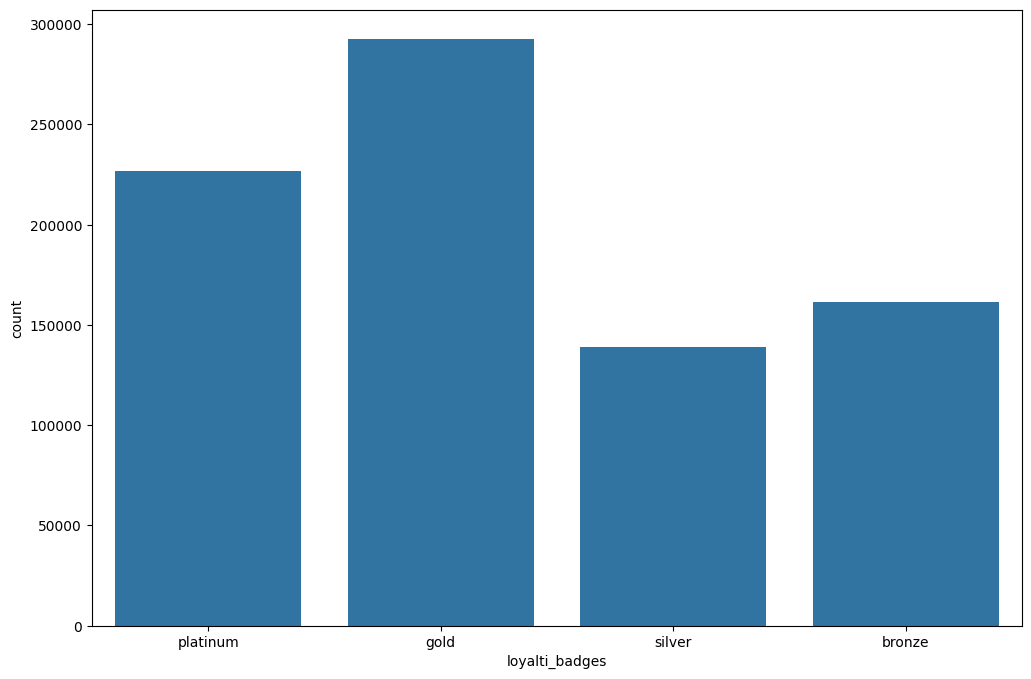

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="loyalti_badges" , data=bank_data_rmf_analyzed)
plt.show()